# Assignment 13: Imbalanced Data, Pipelines and AutoML

### Choosen Datasets:

**Multi-Class Classification - (for imbalanced classes practice)**

[FIFA 2019 game dataset](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/)

<div style="display: flex; justify-content: space-between;">
    <img src="https://assets.goal.com/v3/assets/bltcc7a7ffd2fbf71f5/blt0fbec57c1d2bcf5b/60dd8b6eddcd520eeb913e76/0965fadc121dee53f39d2dbb3d5ce60a16de7195.jpeg?auto=webp&format=pjpg&width=3840&quality=60" width="300" alt="TEIAS Institute logo" />
</div>

The dataset is about predicting the position of football players in FIFA 2019 game.


**Explainable AI**

[Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist)

<div style="display: flex; justify-content: space-between;">
    <img src="https://www.researchgate.net/publication/349913991/figure/fig4/AS:999291262861319@1615261011992/Fashion-MNIST-dataset.ppm" />
</div>

This is a dataset of 70,000 Zalando’s article images. Each image is a 28x28 grayscale image, associated with a label from 10 classes.

<hr>

### Group Members:


*   Ali Zahedzadeh
*   Melika Noubakhtian


<hr>

## **Multi-Class Classification**

multiclass classification or multinomial classification is the problem of classifying instances into one of three or more classes (classifying instances into one of two classes is called binary classification).

<hr>

### About The Dataset 

**Context :**

Analytics of FIFA 19 video game

**Content :**

Player attributes of 18K+ players including league and specialty

<hr>

**Import Libararies**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation


**Load Dataset**

In [12]:
data = pd.read_csv('./Fifa19.csv')
data.head()

,Club,Playing_in_League,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,Real Madrid,Spain Primera Division (1),177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
1,Real Madrid,Spain Primera Division (1),155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
2,Real Madrid,Spain Primera Division (1),182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
3,Real Madrid,Spain Primera Division (1),192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
4,Real Madrid,Spain Primera Division (1),200145,Casemiro,26,https://cdn.sofifa.org/players/4/19/200145.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,90,...,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16344 entries, 0 to 16343
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Club                      16344 non-null  object 
 1   Playing_in_League         16344 non-null  object 
 2   ID                        16344 non-null  int64  
 3   Name                      16344 non-null  object 
 4   Age                       16344 non-null  int64  
 5   Photo                     16344 non-null  object 
 6   Nationality               16344 non-null  object 
 7   Flag                      16344 non-null  object 
 8   Overall                   16344 non-null  int64  
 9   Potential                 16344 non-null  int64  
 10  Club Logo                 16344 non-null  object 
 11  Value                     16344 non-null  object 
 12  Wage                      16344 non-null  object 
 13  Special                   16344 non-null  int64  
 14  Prefer

<hr>

## **Data loading and Cleaning pipeline using `Pandas` pipe**

In this part We use Pandas pipeline for data cleaning.
All of the codes and explainations based on our [Home Work 10](https://github.com/alizahedzadeh/ads-course/blob/main/assignments/Assignment%2010%20Deep%20Neural%20Networks/HW10_Deep_Neural_Networks.ipynb) codes.

In [14]:
import pandas as pd

# Define functions for each step in the pipeline

def load_data(df, path):
    return pd.read_csv(path)

def combine_related_positions(df):
    df.loc[df['Position']=='ST','Position']='CF'
    df.loc[df['Position']=='RS','Position']='RF'
    df.loc[df['Position']=='LS','Position']='LF'

    # Midfield
    df.loc[df['Position'].isin(['RCM','RAM','RDM']),'Position']='RM'
    df.loc[df['Position'].isin(['LCM','LAM','LDM']),'Position']='LM'
    df.loc[df['Position'].isin(['CAM','CDM']),'Position']='CM'

    # Defense
    df.loc[df['Position'].isin(['RW','RWB']),'Position']='RB'
    df.loc[df['Position'].isin(['LW','LWB','CB']),'Position']='LB'

    return df

def drop_columns(df):
    to_drop_columns = ['Name','Photo','Playing_in_League','Nationality','Flag','Club','Club Logo','Real Face','Joined','Contract Valid Until']
    df.drop(columns=to_drop_columns, inplace=True)
    return df

def convert_currency_to_number(x):
    output = x.replace('€','')
    if 'M' in x:
        output = output.replace('M','')
        output = float(output) * 1e6
    elif 'K' in x:
        output = output.replace('K','')
        output = float(output) * 1e3
    output = float(output)
    return output

def convert_height_to_number(x):
    output = x.replace("'",'.')
    return float(output) * 30.48

def convert_weight_to_number(x):
    output = x.replace("lbs",'')
    return float(output) * 0.4205

def clean_data(df):
    df.drop(['Loaned From'], axis=1, inplace=True)
    df.dropna(inplace=True)
    df['Value'] = df['Value'].apply(convert_currency_to_number)
    df['Wage'] = df['Wage'].apply(convert_currency_to_number)
    df['Release Clause'] = df['Release Clause'].apply(convert_currency_to_number)
    df['Height'] = df['Height'].apply(convert_height_to_number)
    df['Weight'] = df['Weight'].apply(convert_weight_to_number)

    # Skill columns processing
    skills_columns = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
                      'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB',
                      'LB','LCB','CB','RCB','RB']
    for col_name in skills_columns:
        df[col_name] = df[col_name].str.split('+').str[0]
        df[col_name] = df[col_name].astype(int)

    return df

# Create a Pandas pipeline using the pipe method
pandas_pipe_df = (
    pd.DataFrame()  # Initialize an empty dataframe
    .pipe(load_data, path='./Fifa19.csv')
    .pipe(combine_related_positions)
    .pipe(drop_columns)
    .pipe(clean_data)
)

# Display the resulting dataframe
pandas_pipe_df.head()


,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,177003,32,91,91,67000000.0,420000.0,2280,Right,4.0,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
1,155862,32,91,91,51000000.0,380000.0,2201,Right,4.0,3.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
2,182521,28,90,90,76500000.0,355000.0,2190,Right,4.0,5.0,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156800000.0
4,200145,26,88,90,59500000.0,285000.0,2170,Right,3.0,3.0,...,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,126400000.0
5,197781,26,88,91,73500000.0,315000.0,2137,Right,3.0,3.0,...,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,156200000.0


In [15]:
pandas_pipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13425 entries, 0 to 16343
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        13425 non-null  int64  
 1   Age                       13425 non-null  int64  
 2   Overall                   13425 non-null  int64  
 3   Potential                 13425 non-null  int64  
 4   Value                     13425 non-null  float64
 5   Wage                      13425 non-null  float64
 6   Special                   13425 non-null  int64  
 7   Preferred Foot            13425 non-null  object 
 8   International Reputation  13425 non-null  float64
 9   Weak Foot                 13425 non-null  float64
 10  Skill Moves               13425 non-null  float64
 11  Work Rate                 13425 non-null  object 
 12  Body Type                 13425 non-null  object 
 13  Position                  13425 non-null  object 
 14  Jersey Numb

<hr>

## **Preprocessing pipeline using `Scikit-learn pipelines`**

The provided code creates a scikit-learn pipeline for predicting football player positions using. The pipeline includes data loading, preprocessing, and a Random Forest Classifier for training and testing. 

After training the model, it calculates the accuracy and displays a confusion matrix to evaluate the performance.
 
The confusion matrix visually represents the number of correct and incorrect predictions for each player position, aiding in understanding the model's predictive capabilities. 

In [22]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
path = './Fifa19.csv'
df = pd.read_csv(path)

# Combine related positions
df.loc[df['Position'].isin(['ST', 'RS', 'LS']), 'Position'] = 'CF'
df.loc[df['Position'].isin(['RCM', 'RAM', 'RDM']), 'Position'] = 'RM'
df.loc[df['Position'].isin(['LCM', 'LAM', 'LDM']), 'Position'] = 'LM'
df.loc[df['Position'].isin(['CAM', 'CDM']), 'Position'] = 'CM'
df.loc[df['Position'].isin(['RW', 'RWB']), 'Position'] = 'RB'
df.loc[df['Position'].isin(['LW', 'LWB', 'CB']), 'Position'] = 'LB'

# Drop 'Loaned From' and handle null values
df.drop(['Loaned From'], axis=1, inplace=True)
df.dropna(inplace=True)

# Skill columns processing
skills_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
                  'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB',
                  'LB', 'LCB', 'CB', 'RCB', 'RB']

for col_name in skills_columns:
    df[col_name] = pd.to_numeric(df[col_name].str.split('+').str[0], errors='coerce')

# Drop unnecessary columns
to_drop_columns = ['Name', 'Photo', 'Playing_in_League', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Real Face', 'Joined', 'Contract Valid Until']
df.drop(to_drop_columns, axis=1, inplace=True)

# Convert currency columns to numbers
def convert_currency_to_number(x):
    output = x.replace('€', '')
    if 'M' in x:
        output = output.replace('M', '')
        output = float(output) * 1e6
    elif 'K' in x:
        output = output.replace('K', '')
        output = float(output) * 1e3
    output = float(output)
    return output

df['Value'] = df['Value'].apply(convert_currency_to_number)
df['Wage'] = df['Wage'].apply(convert_currency_to_number)
df['Release Clause'] = df['Release Clause'].apply(convert_currency_to_number)

# Convert height and weight to standard units
df['Height'] = df['Height'].apply(lambda x: float(x.replace("'", '.')) * 30.48)
df['Weight'] = df['Weight'].apply(lambda x: float(x.replace("lbs", '')) * 0.453592)

# Separate features and target
X = df.drop('Position', axis=1)
y = df['Position']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the final pipeline with the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.60


**Confussion Matrix and Results**

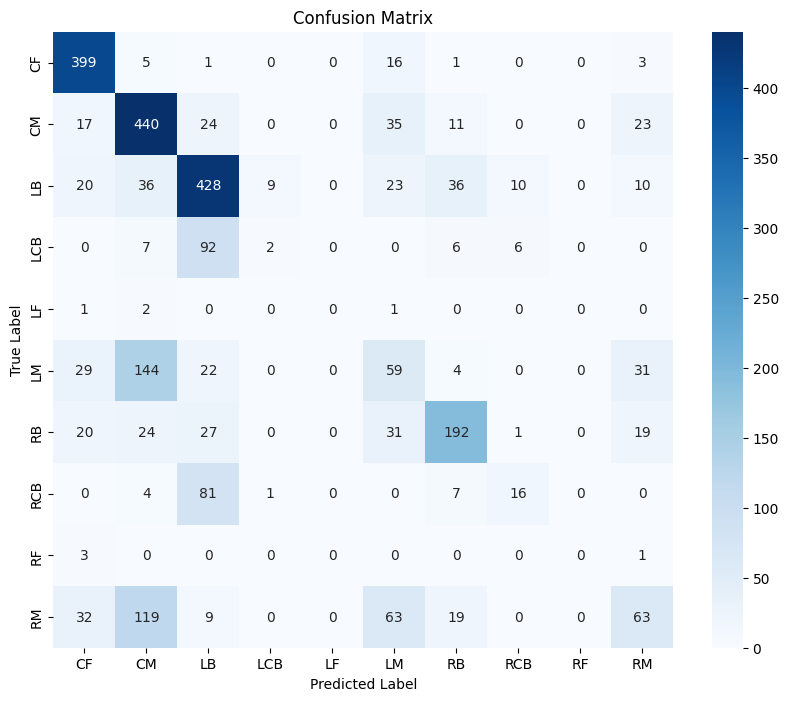

In [23]:
# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.named_steps['classifier'].classes_, yticklabels=pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<hr>

## **Checking Imbalanced Class**

The provided code creates a bar plot to visualize the distribution of player positions in a dataset

And we can see Our dataset is have Imbalanced Classes.

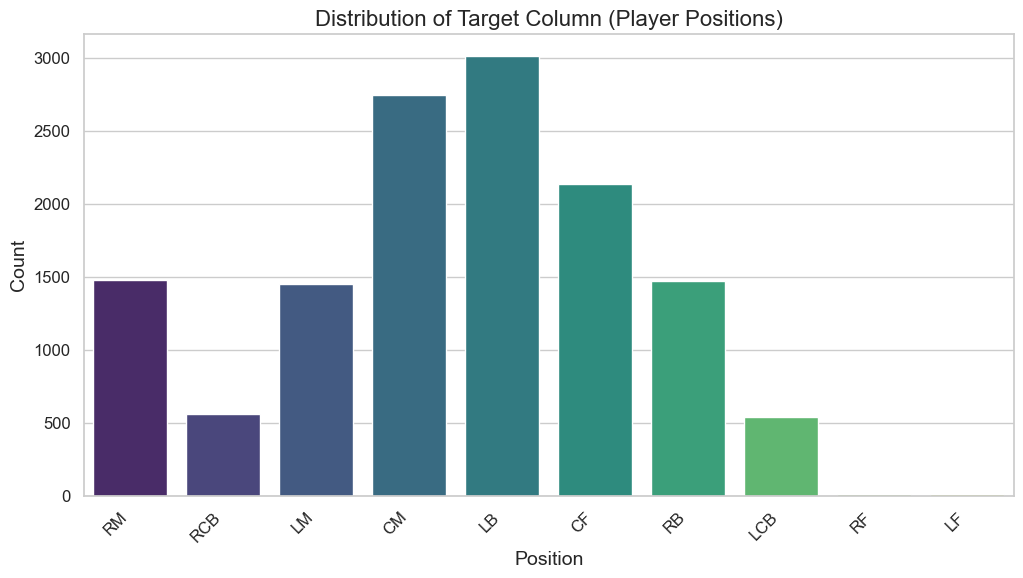

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y' is your target column
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.countplot(x='Position', data=df, hue='Position', palette="viridis", dodge=False)
plt.title('Distribution of Target Column (Player Positions)', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## **Random undersampling for the majority classes**

Accuracy before undersampling: 0.60


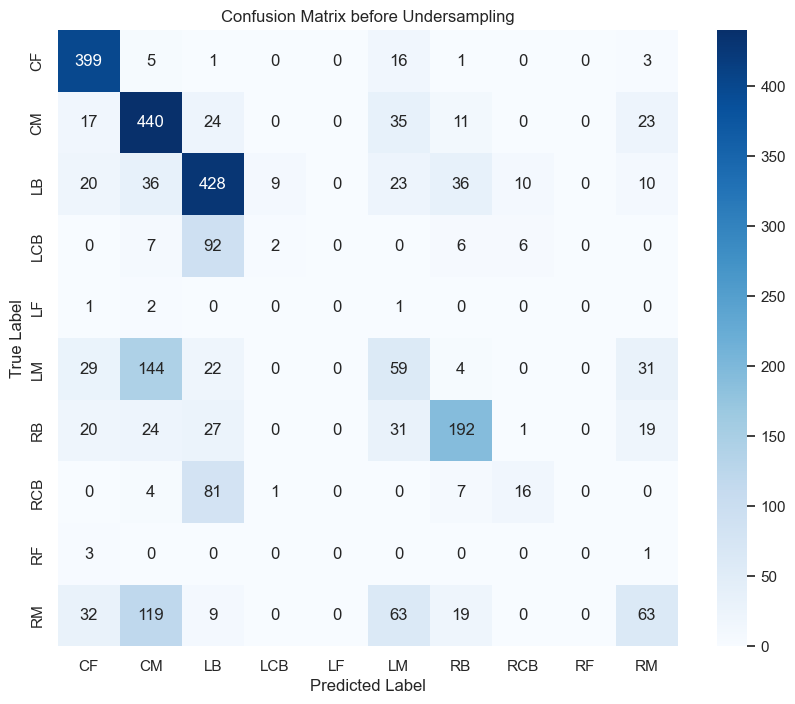

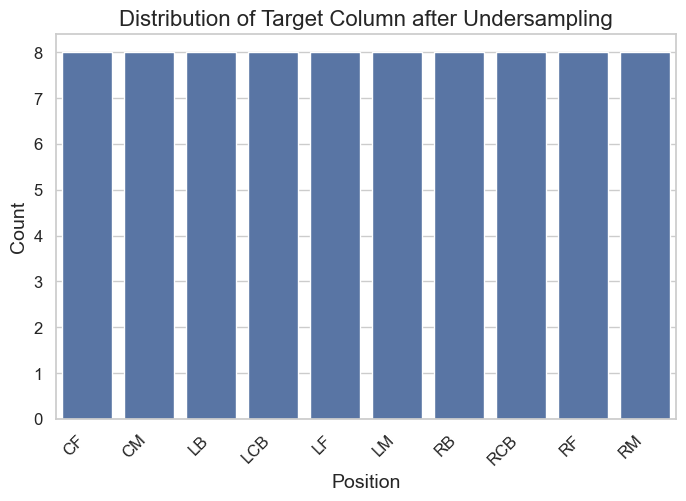

Accuracy after undersampling: 0.31


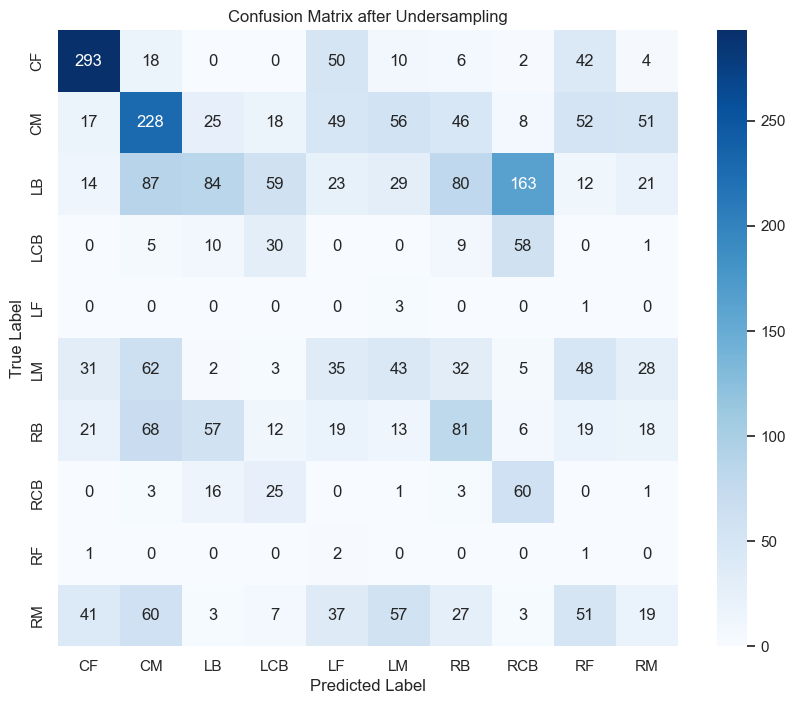

In [31]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separate features and target
X = df.drop('Position', axis=1)
y = df['Position']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the final pipeline with the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate the performance without undersampling
accuracy_before_undersampling = accuracy_score(y_test, y_pred)
print(f'Accuracy before undersampling: {accuracy_before_undersampling:.2f}')

# Calculate and display the confusion matrix without undersampling
conf_matrix_before_undersampling = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_before_undersampling, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.named_steps['classifier'].classes_, yticklabels=pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix before Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Apply random undersampling to the majority class
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(x='Position', data=pd.DataFrame({'Position': y_resampled}))
plt.title('Distribution of Target Column after Undersampling', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Fit the pipeline on the resampled data
pipeline.fit(X_resampled, y_resampled)

# Predict on test data after undersampling
y_pred_undersampled = pipeline.predict(X_test)

# Evaluate the performance after undersampling
accuracy_after_undersampling = accuracy_score(y_test, y_pred_undersampled)
print(f'Accuracy after undersampling: {accuracy_after_undersampling:.2f}')

# Calculate and display the confusion matrix after undersampling
conf_matrix_after_undersampling = confusion_matrix(y_test, y_pred_undersampled)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_after_undersampling, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.named_steps['classifier'].classes_, yticklabels=pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix after Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## **Random oversampling for the miniority classes**

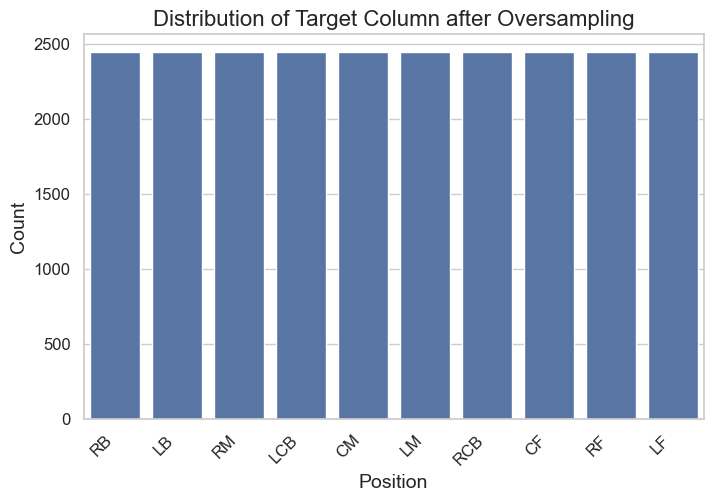

Accuracy after oversampling: 0.58


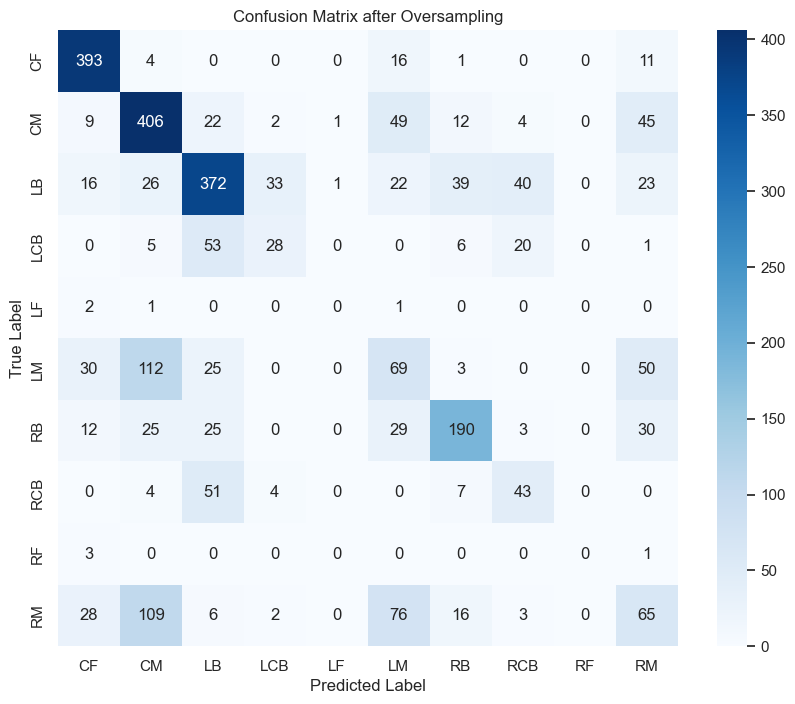

In [32]:
from imblearn.over_sampling import RandomOverSampler

# Separate features and target
X = df.drop('Position', axis=1)
y = df['Position']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply random oversampling to the minority class
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(x='Position', data=pd.DataFrame({'Position': y_resampled}))
plt.title('Distribution of Target Column after Oversampling', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the final pipeline with the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the resampled data
pipeline.fit(X_resampled, y_resampled)

# Predict on test data after oversampling
y_pred_oversampled = pipeline.predict(X_test)

# Evaluate the performance after oversampling
accuracy_after_oversampling = accuracy_score(y_test, y_pred_oversampled)
print(f'Accuracy after oversampling: {accuracy_after_oversampling:.2f}')

# Calculate and display the confusion matrix after oversampling
conf_matrix_after_oversampling = confusion_matrix(y_test, y_pred_oversampled)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_after_oversampling, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.named_steps['classifier'].classes_, yticklabels=pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix after Oversampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## **SMOTE oversampling**

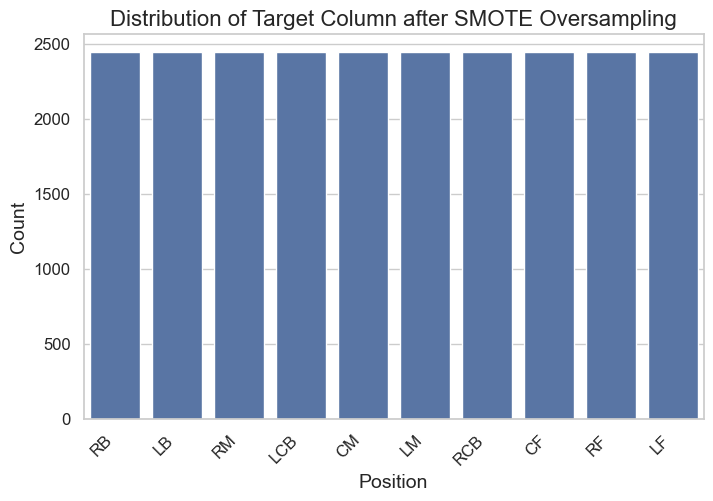

Accuracy after SMOTE oversampling: 0.57


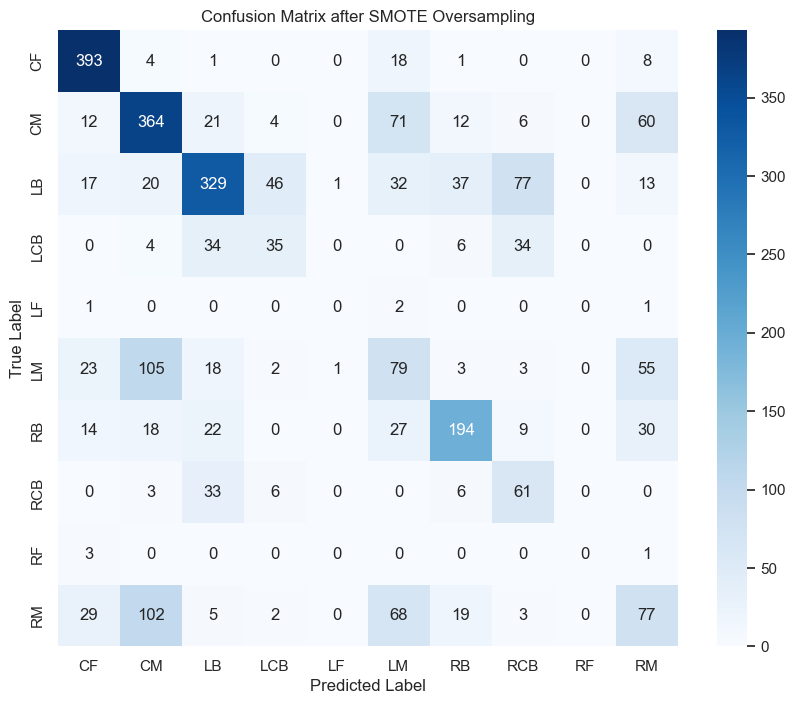

In [42]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop('Position', axis=1)
y = df['Position']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE for oversampling to the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(x='Position', data=pd.DataFrame({'Position': y_resampled}))
plt.title('Distribution of Target Column after SMOTE Oversampling', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Create the final pipeline with the classifier
pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the resampled data
pipeline.fit(X_resampled, y_resampled)

# Predict on test data after SMOTE oversampling
y_pred_smote = pipeline.predict(X_test_preprocessed)

# Evaluate the performance after SMOTE oversampling
accuracy_after_smote = accuracy_score(y_test, y_pred_smote)
print(f'Accuracy after SMOTE oversampling: {accuracy_after_smote:.2f}')

# Calculate and display the confusion matrix after SMOTE oversampling
conf_matrix_after_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_after_smote, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.named_steps['classifier'].classes_, yticklabels=pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix after SMOTE Oversampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **Use Class weights to perform cost-senisitve training**

This code adds the `compute_class_weight` function to calculate class weights and applies these weights to the `RandomForestClassifier` during the pipeline creation.

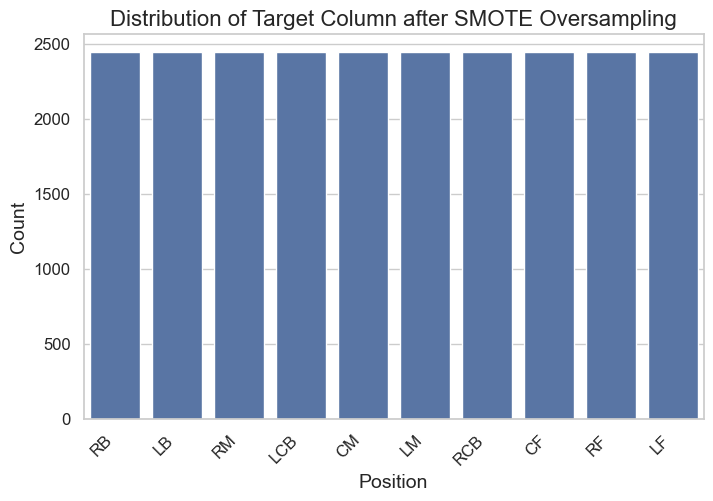

Accuracy after SMOTE oversampling: 0.57


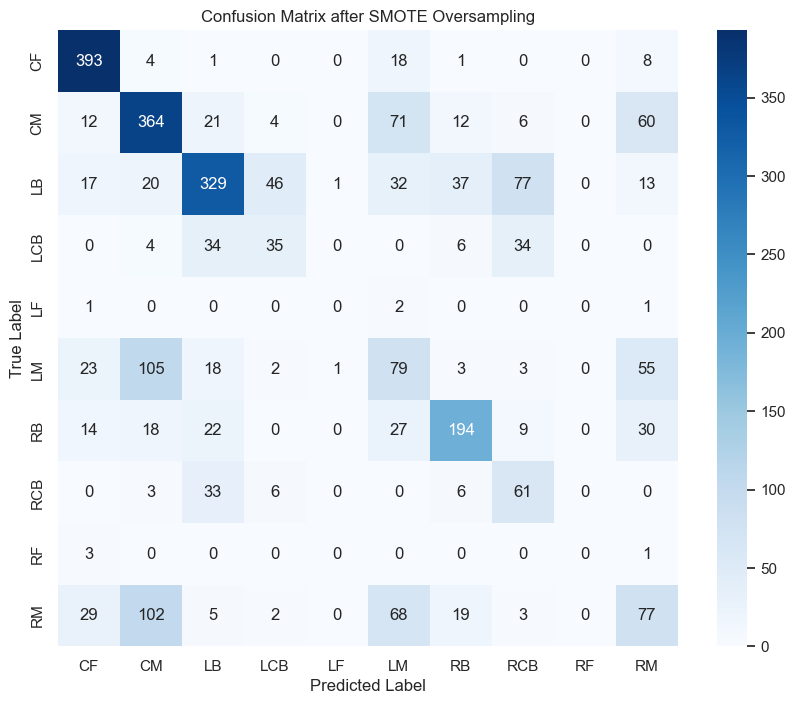

In [45]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

# Separate features and target
X = df.drop('Position', axis=1)
y = df['Position']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE for oversampling to the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(x='Position', data=pd.DataFrame({'Position': y_resampled}))
plt.title('Distribution of Target Column after SMOTE Oversampling', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Manually define class weights based on our dataset
class_weights = {'CF': 1.0, 'CM': 1.0, 'LB': 1.0, 'LCB': 1.0, 'LF': 1.0, 'LM': 1.0, 'RB': 1.0, 'RCB': 1.0, 'RF': 1.0, 'RM': 1.0}

# Create the final pipeline with the classifier
pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42, class_weight=class_weights))
])

# Fit the pipeline on the resampled data
pipeline.fit(X_resampled, y_resampled)

# Predict on test data after SMOTE oversampling
y_pred_smote = pipeline.predict(X_test_preprocessed)

# Evaluate the performance after SMOTE oversampling
accuracy_after_smote = accuracy_score(y_test, y_pred_smote)
print(f'Accuracy after SMOTE oversampling: {accuracy_after_smote:.2f}')

# Calculate and display the confusion matrix after SMOTE oversampling
conf_matrix_after_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_after_smote, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.named_steps['classifier'].classes_, yticklabels=pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix after SMOTE Oversampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<hr>

## **Explainable AI**